In [1]:
# 기본 라이브러리
from datetime import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv(r'C:\Users\USER\Downloads\Untitled\daily.csv', encoding='UTF-8')

In [3]:
#datetime 변환
raw_df['datetime'] = raw_df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [4]:
raw_df

,date,hr_emp_center,hr_dvsn_center,hr_duty_center,hr_busi_center,hr_dvsn_info_mrt,hr_dvsn_date_mrt,hr_busi_date_mrt,hr_bef_aft,hr_emp_ath,hr_dty_rcmd_emp,datetime
0,2023-03-01,16322,430,150,7861,4954,4954,9132,4387,16322,1889812,2023-03-01
1,2023-03-02,16206,430,150,7861,4954,4954,9132,4387,16206,2243828,2023-03-02
2,2023-03-05,16207,430,150,7860,4959,4959,9132,4387,16207,2243976,2023-03-05
3,2023-03-06,16208,430,150,7854,4963,4963,9127,4389,16208,2243976,2023-03-06
4,2023-03-07,16207,430,150,7853,4963,4963,9126,4389,16207,2243828,2023-03-07
5,2023-03-08,16207,430,150,7853,4963,4963,9126,4389,16207,2243828,2023-03-08
6,2023-03-12,16210,430,150,7852,4965,4965,9126,4390,16210,2244272,2023-03-12
7,2023-03-13,16209,430,150,7853,4964,4964,9126,4391,16209,2244124,2023-03-13
8,2023-03-14,16204,430,150,7854,4964,4964,9126,4391,16204,2243384,2023-03-14
9,2023-03-15,16204,397,148,7852,4586,4586,9126,4342,16204,2213068,2023-03-15


In [5]:
df = raw_df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              28 non-null     object        
 1   hr_emp_center     28 non-null     int64         
 2   hr_dvsn_center    28 non-null     int64         
 3   hr_duty_center    28 non-null     int64         
 4   hr_busi_center    28 non-null     int64         
 5   hr_dvsn_info_mrt  28 non-null     int64         
 6   hr_dvsn_date_mrt  28 non-null     int64         
 7   hr_busi_date_mrt  28 non-null     int64         
 8   hr_bef_aft        28 non-null     int64         
 9   hr_emp_ath        28 non-null     int64         
 10  hr_dty_rcmd_emp   28 non-null     int64         
 11  datetime          28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 2.8+ KB


In [7]:
df.head()

,date,hr_emp_center,hr_dvsn_center,hr_duty_center,hr_busi_center,hr_dvsn_info_mrt,hr_dvsn_date_mrt,hr_busi_date_mrt,hr_bef_aft,hr_emp_ath,hr_dty_rcmd_emp,datetime
0,2023-03-01,16322,430,150,7861,4954,4954,9132,4387,16322,1889812,2023-03-01
1,2023-03-02,16206,430,150,7861,4954,4954,9132,4387,16206,2243828,2023-03-02
2,2023-03-05,16207,430,150,7860,4959,4959,9132,4387,16207,2243976,2023-03-05
3,2023-03-06,16208,430,150,7854,4963,4963,9127,4389,16208,2243976,2023-03-06
4,2023-03-07,16207,430,150,7853,4963,4963,9126,4389,16207,2243828,2023-03-07


In [8]:
# datetime 인덱스 지정
df.set_index(df['datetime'], inplace=True)
df.head()

,date,hr_emp_center,hr_dvsn_center,hr_duty_center,hr_busi_center,hr_dvsn_info_mrt,hr_dvsn_date_mrt,hr_busi_date_mrt,hr_bef_aft,hr_emp_ath,hr_dty_rcmd_emp,datetime
datetime,,,,,,,,,,,,
2023-03-01,2023-03-01,16322,430,150,7861,4954,4954,9132,4387,16322,1889812,2023-03-01
2023-03-02,2023-03-02,16206,430,150,7861,4954,4954,9132,4387,16206,2243828,2023-03-02
2023-03-05,2023-03-05,16207,430,150,7860,4959,4959,9132,4387,16207,2243976,2023-03-05
2023-03-06,2023-03-06,16208,430,150,7854,4963,4963,9127,4389,16208,2243976,2023-03-06
2023-03-07,2023-03-07,16207,430,150,7853,4963,4963,9126,4389,16207,2243828,2023-03-07


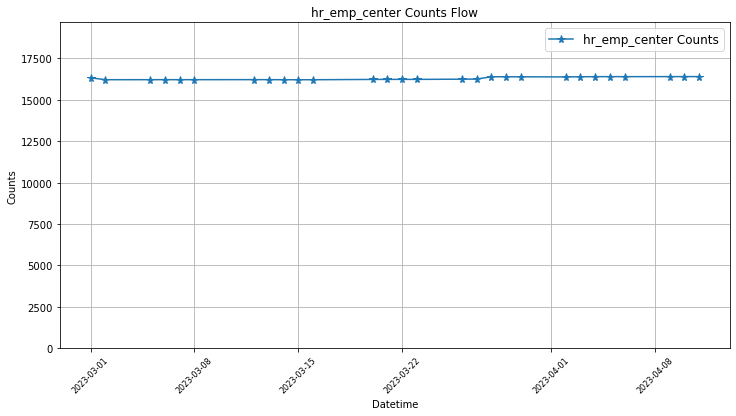

In [19]:
# hr_emp_center 컬럼 선택하여 그래프 그리기
df_emp = df['hr_emp_center']

plt.figure(figsize=(12, 6)) # 그래프 사이즈 지정
plt.xticks(size=8, rotation=45) # x축 눈금 라벨 폰트 사이즈 8로 지정하고 45도 회전
plt.plot(df_emp, marker='*', markersize=8)
plt.title('hr_emp_center Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_emp.max() + df_emp.max() * 0.2) # y축 최솟값 0, 최댓값 (데이터 맥스치 + 맥스치 * 0.2)
plt.legend(labels=['hr_emp_center Counts'], loc='best', fontsize=12)
plt.grid(True)
plt.show()

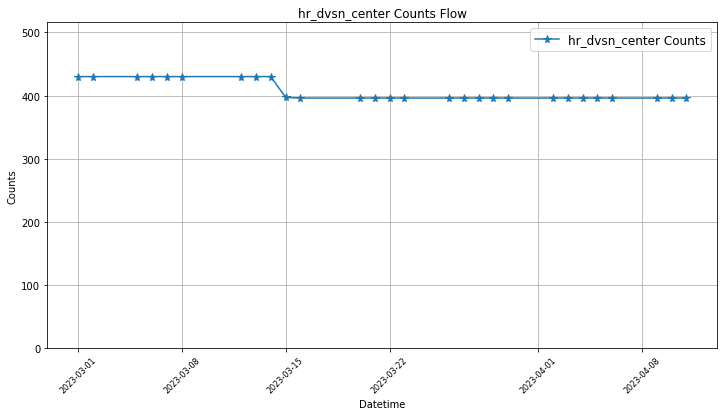

In [20]:
# hr_dvsn_center 컬럼 선택하여 그래프 그리기
df_dvsv = df['hr_dvsn_center']

plt.figure(figsize=(12, 6))
plt.xticks(size=8, rotation=45)
plt.plot(df_dvsv, marker='*', markersize=8)
plt.title('hr_dvsn_center Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_dvsv.max() + df_dvsv.max() * 0.2)
plt.legend(labels=['hr_dvsn_center Counts'], loc='best', fontsize=12)
plt.grid(True)
plt.show()

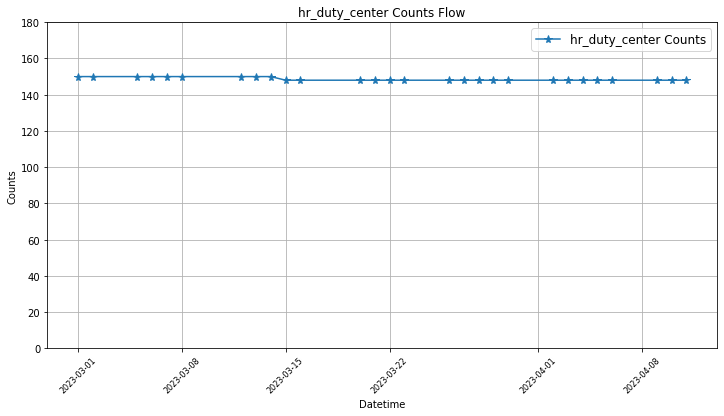

In [21]:
# hr_duty_center 컬럼 선택하여 그래프 그리기
df_duty = df['hr_duty_center']

plt.figure(figsize=(12, 6))
plt.xticks(size=8, rotation=45)
plt.plot(df_duty, marker='*', markersize=8)
plt.title('hr_duty_center Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_duty.max() + df_duty.max() * 0.2)
plt.legend(labels=['hr_duty_center Counts'], loc='best', fontsize=12)
plt.grid(True)
plt.show()

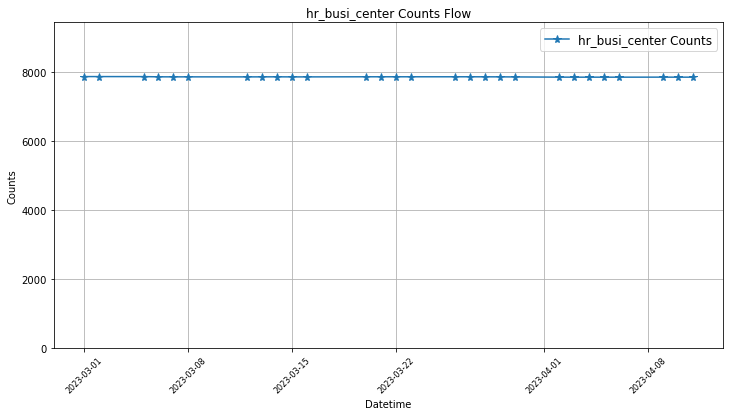

In [22]:
# hr_busi_center 컬럼 선택하여 그래프 그리기
df_busi = df['hr_busi_center']

plt.figure(figsize=(12, 6))
plt.xticks(size=8, rotation=45)
plt.plot(df_busi, marker='*', markersize=8)
plt.title('hr_busi_center Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_busi.max() + df_busi.max() * 0.2)
plt.legend(labels=['hr_busi_center Counts'], loc='best', fontsize=12)
plt.grid(True)
plt.show()

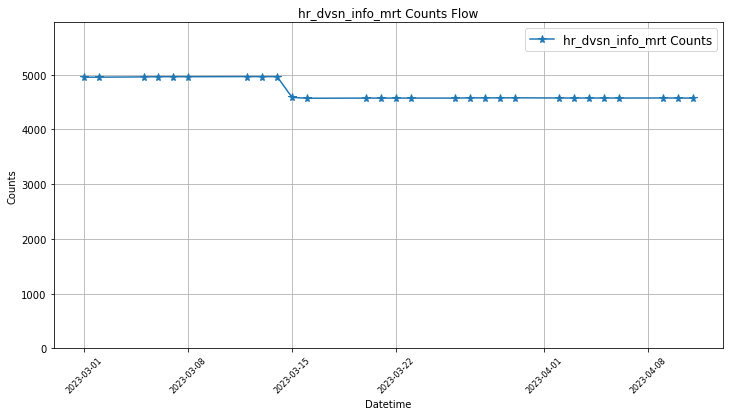

In [23]:
# hr_dvsn_info_mrt 컬럼 선택하여 그래프 그리기
df_dvsn_info = df['hr_dvsn_info_mrt']

plt.figure(figsize=(12, 6))
plt.xticks(size=8, rotation=45)
plt.plot(df_dvsn_info, marker='*', markersize=8)
plt.title('hr_dvsn_info_mrt Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_dvsn_info.max() + df_dvsn_info.max() * 0.2)
plt.legend(labels=['hr_dvsn_info_mrt Counts'], loc='best', fontsize=12)
plt.grid(True)
plt.show()

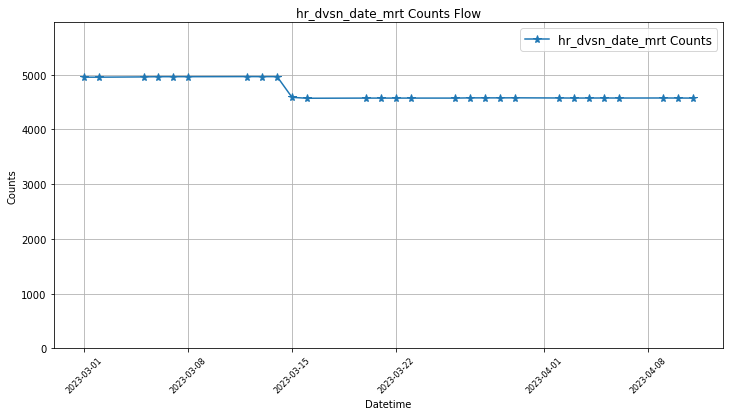

In [24]:
# hr_dvsn_date_mrt 컬럼 선택하여 그래프 그리기
df_dvsn_date = df['hr_dvsn_date_mrt']

plt.figure(figsize=(12, 6))
plt.xticks(size=8, rotation=45)
plt.plot(df_dvsn_date, marker='*', markersize=8)
plt.title('hr_dvsn_date_mrt Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_dvsn_date.max() + df_dvsn_date.max() * 0.2)
plt.legend(labels=['hr_dvsn_date_mrt Counts'], loc='best', fontsize=12)
plt.grid(True)
plt.show()

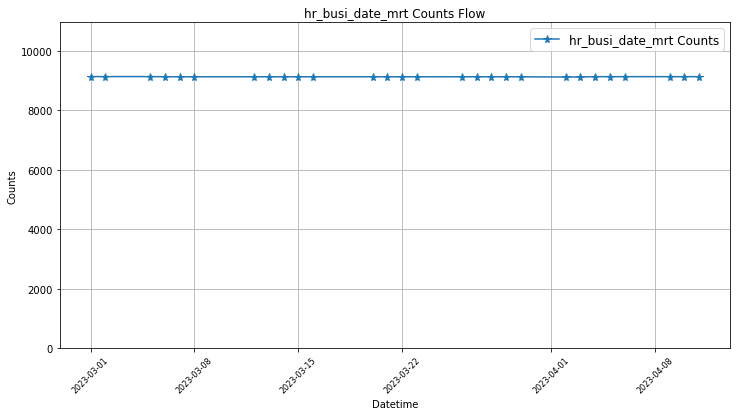

In [25]:
# hr_busi_date_mrt 컬럼 선택하여 그래프 그리기
df_busi_date = df['hr_busi_date_mrt']

plt.figure(figsize=(12, 6))
plt.xticks(size=8, rotation=45)
plt.plot(df_busi_date, marker='*', markersize=8)
plt.title('hr_busi_date_mrt Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_busi_date.max() + df_busi_date.max() * 0.2)
plt.legend(labels=['hr_busi_date_mrt Counts'], loc='best', fontsize=12)
plt.grid(True)
plt.show()

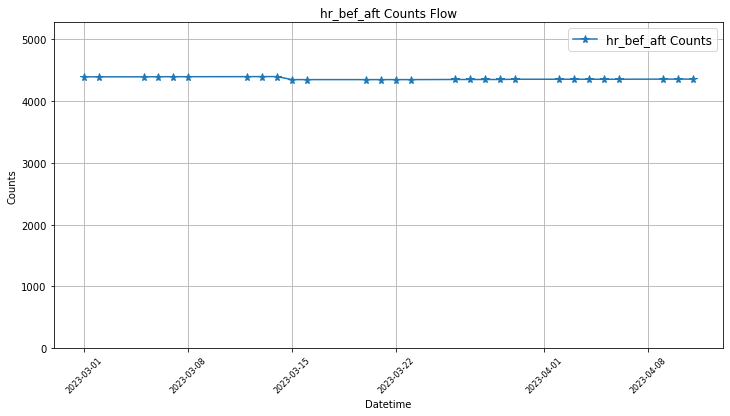

In [16]:
# hr_bef_aft 컬럼 선택하여 그래프 그리기
df_bef_aft = df['hr_bef_aft']

plt.figure(figsize=(12, 6))
plt.xticks(size=8, rotation=45)
plt.plot(df_bef_aft, marker='*', markersize=8)
plt.title('hr_bef_aft Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_bef_aft.max() + df_bef_aft.max() * 0.2)
plt.legend(labels=['hr_bef_aft Counts'], loc='best', fontsize=12)
plt.grid(True)

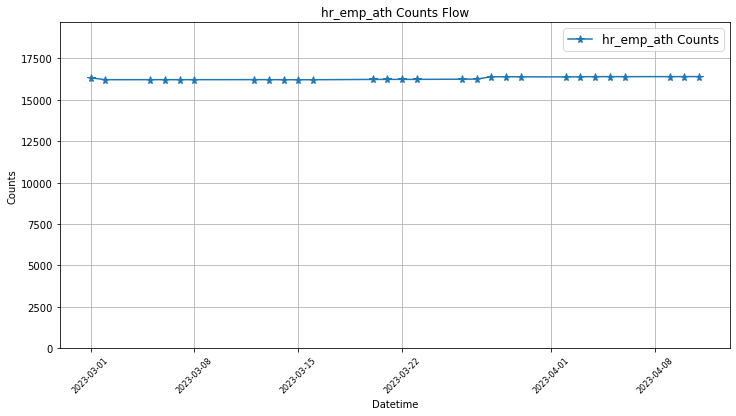

In [26]:
# hr_emp_ath 컬럼 선택하여 그래프 그리기
df_ath = df['hr_emp_ath']

plt.figure(figsize=(12, 6))
plt.xticks(size=8, rotation=45)
plt.plot(df_ath, marker='*', markersize=8)
plt.title('hr_emp_ath Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_ath.max() + df_ath.max() * 0.2)
plt.legend(labels=['hr_emp_ath Counts'], loc='best', fontsize=12)
plt.grid(True)
plt.show()

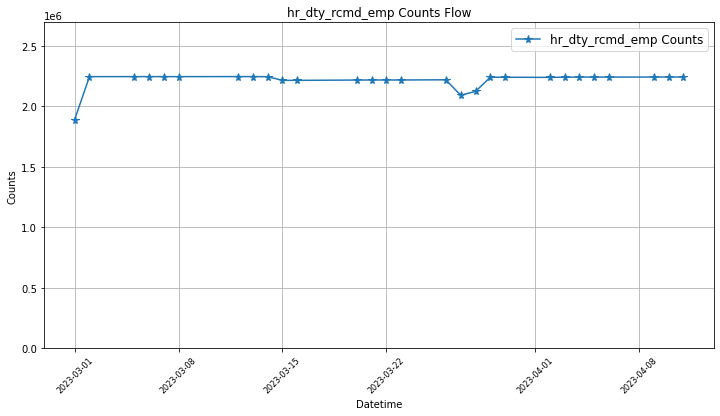

In [27]:
# hr_dty_rcmd_emp 컬럼 선택하여 그리기
df_rcmd = df['hr_dty_rcmd_emp']

plt.figure(figsize=(12, 6))
plt.xticks(size=8, rotation=45)
plt.plot(df_rcmd, marker='*', markersize=8)
plt.title('hr_dty_rcmd_emp Counts Flow')
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.ylim(0, df_rcmd.max() + df_rcmd.max() * 0.2)
plt.legend(labels=['hr_dty_rcmd_emp Counts'], loc='best', fontsize=12)
plt.grid(True)
plt.show()